# Imports

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

# Read the Data

In [58]:
df=pd.read_csv("bank.csv")

In [59]:
df.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,2343,yes,no,unknown,5,may,1042,1,-1,0,yes
1,56,admin.,married,secondary,45,no,no,unknown,5,may,1467,1,-1,0,yes
2,41,technician,married,secondary,1270,yes,no,unknown,5,may,1389,1,-1,0,yes
3,55,services,married,secondary,2476,yes,no,unknown,5,may,579,1,-1,0,yes
4,54,admin.,married,tertiary,184,no,no,unknown,5,may,673,2,-1,0,yes


In [65]:
def remove_outliers(col):
    fig,ax=plt.subplots((2))
    sb.boxplot(data=df,x=col,ax=ax[0])
    q1=df[col].quantile(.25)
    q3=df[col].quantile(.75)
    IQR=q3-q1
    lower=q1-1.5*IQR
    upper=q3+1.5*IQR
    upper_values=df[df[col]>upper][col].values
    lower_values=df[df[col]<lower][col].values
    df[col].replace(upper_values,upper,inplace=True)
    df[col].replace(lower_values,lower,inplace=True)
    sb.boxplot(data=df,x=col,ax=ax[1])


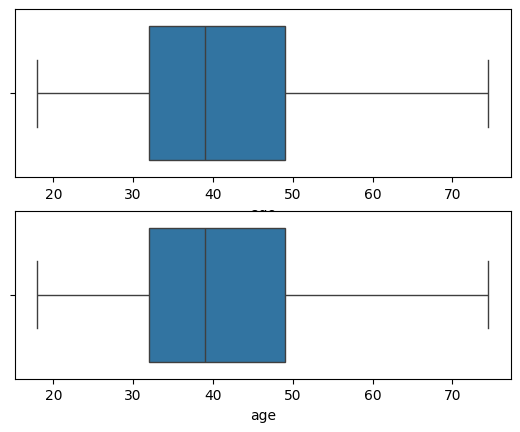

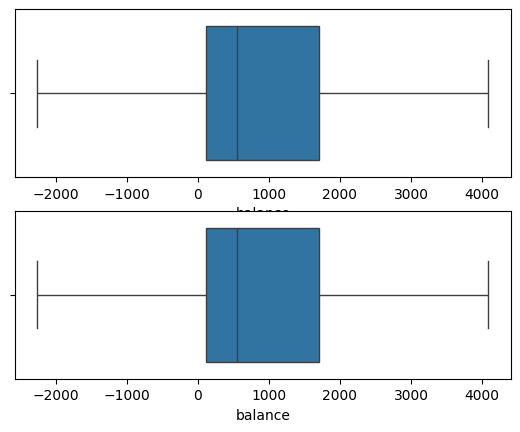

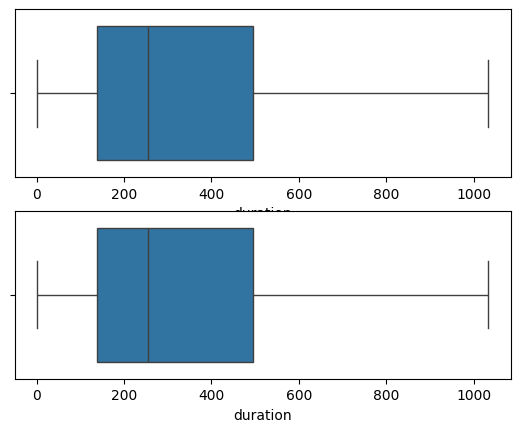

In [66]:
for col in ['age','balance','duration']:
    remove_outliers(col)

In [75]:
cols=['age','balance','duration']
plt.figure(figsize=(20,10))
for i,col in enumerate(cols):
    plt.subplot(4,2,i+1)
    sb.histplot(data=df,x=col)
plt.show()

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x000001C3C35D8BE0>>
Traceback (most recent call last):
  File "c:\users\mohammed\trials_with_ml\handson\lib\site-packages\ipykernel\ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 

KeyboardInterrupt



<Axes: xlabel='duration', ylabel='Count'>

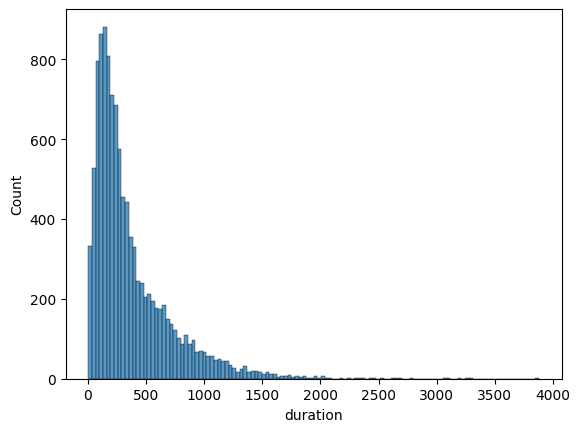

In [28]:
sb.histplot(data=df,x='duration')

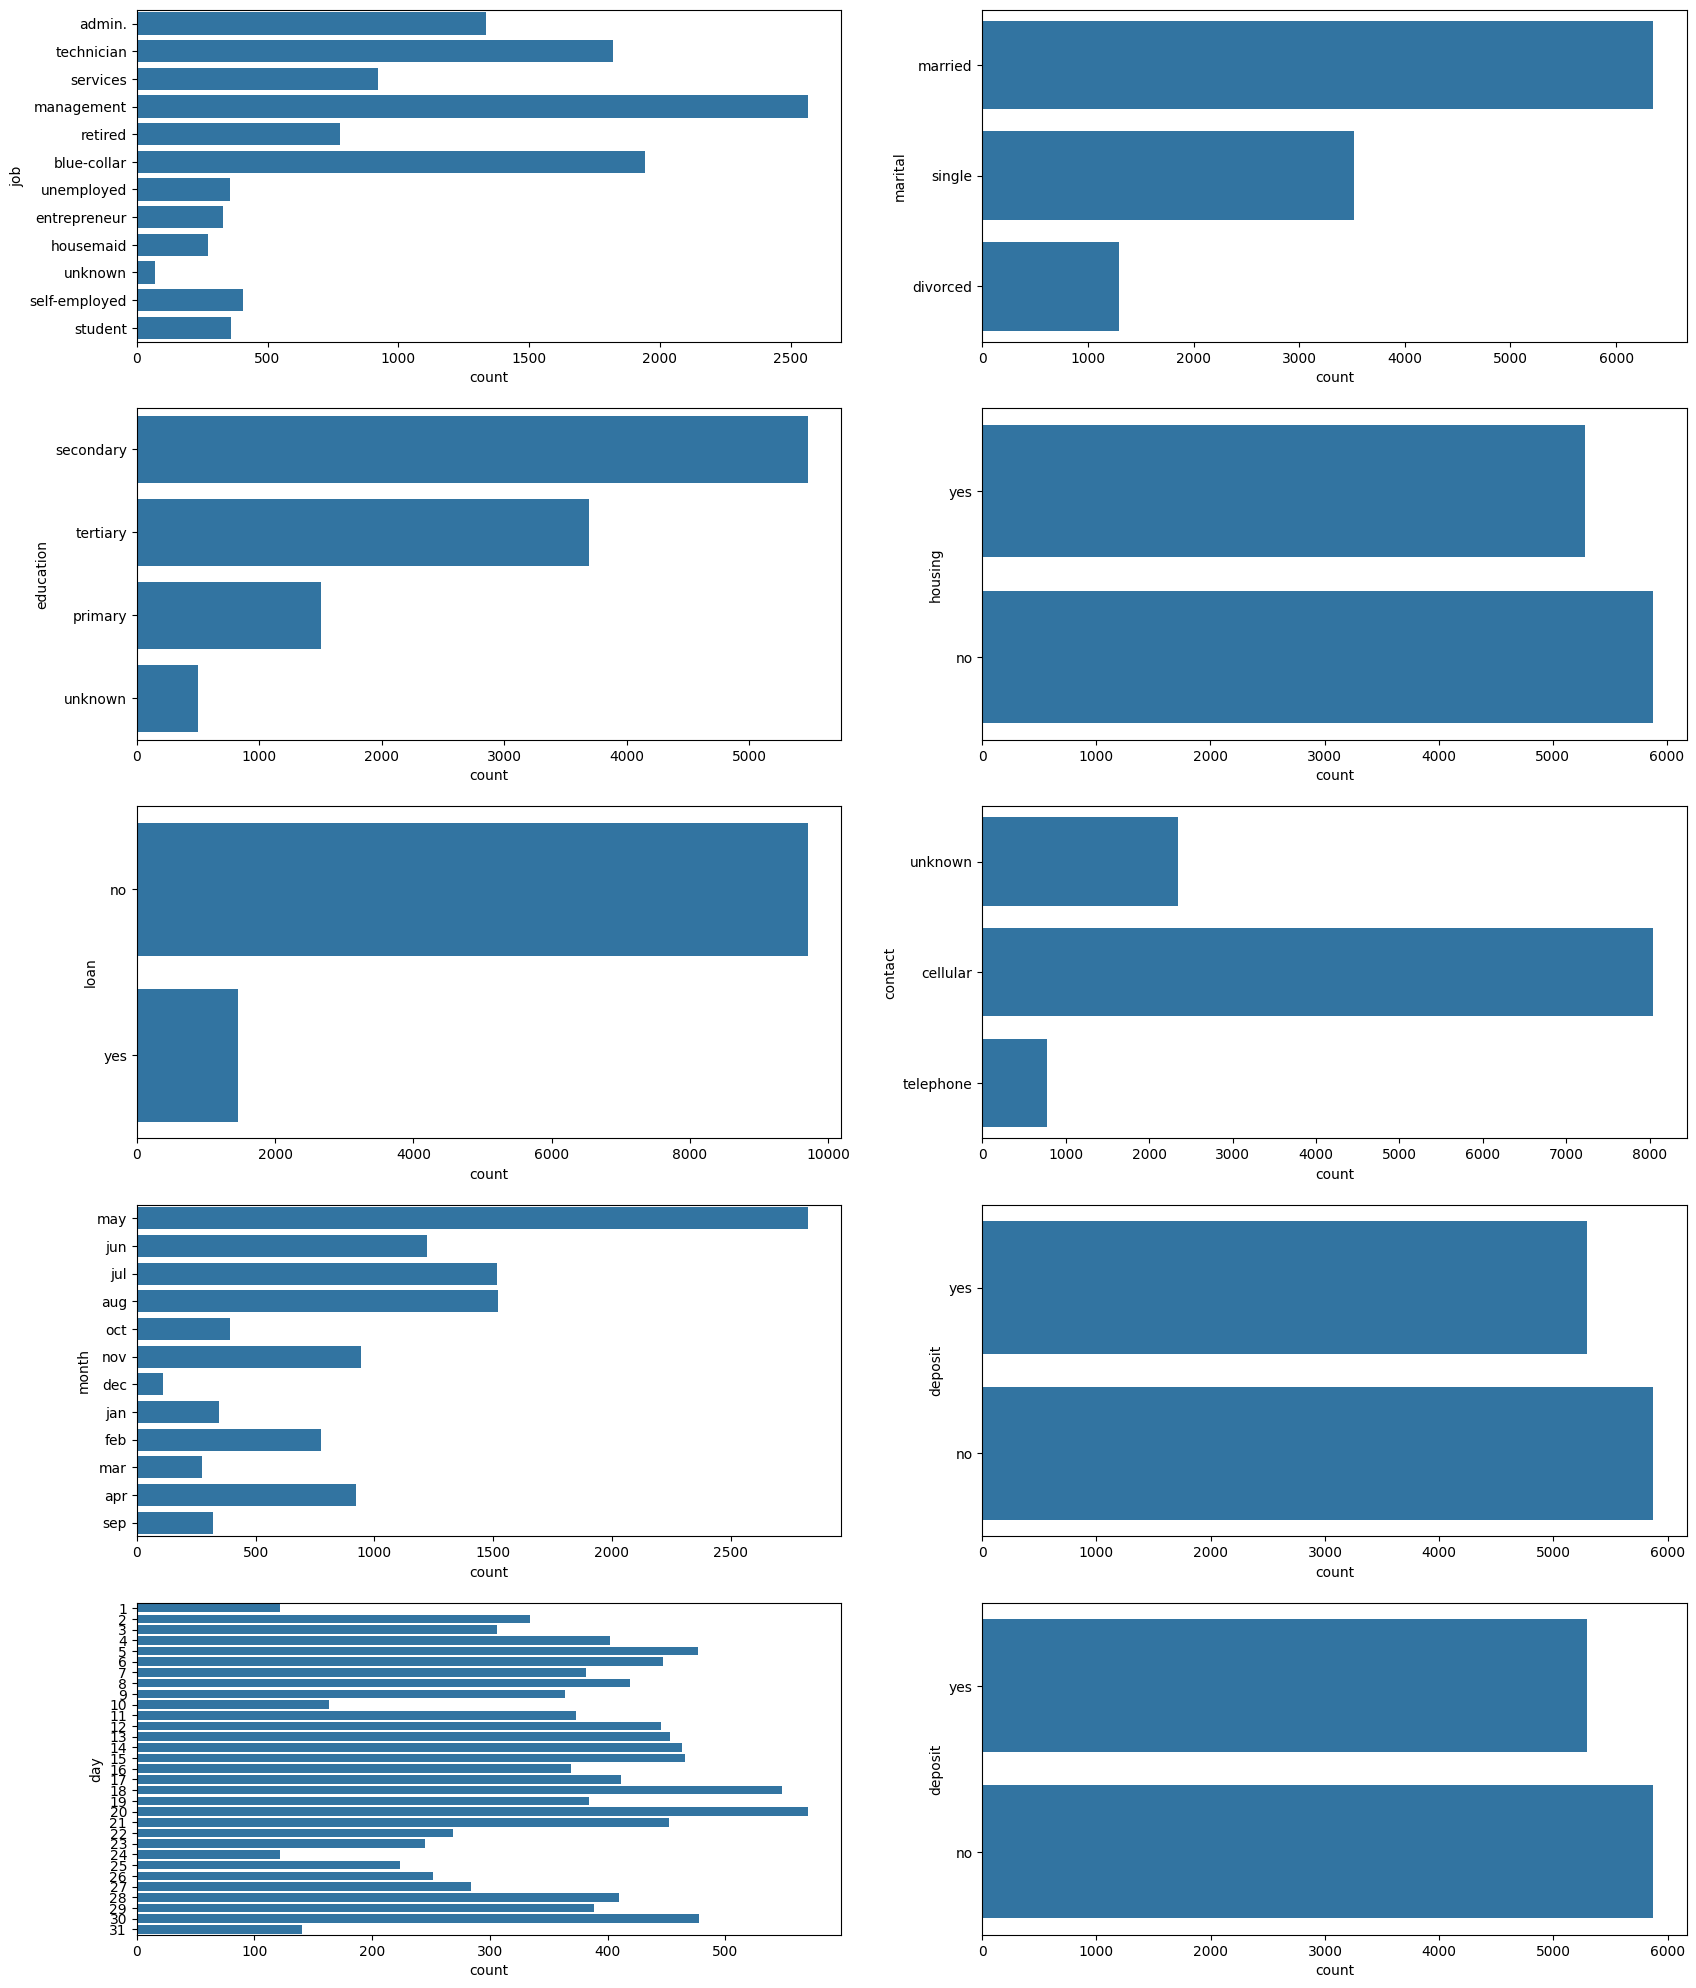

In [98]:
cat=list(df.select_dtypes('object').columns)
cat.append('day')
cat.append('deposit')
plt.figure(figsize=(20,25))
for i,col in enumerate(cat):
    plt.subplot(5,2,i+1)
    sb.countplot(data=df,y=col)
    

<Axes: xlabel='balance', ylabel='job'>

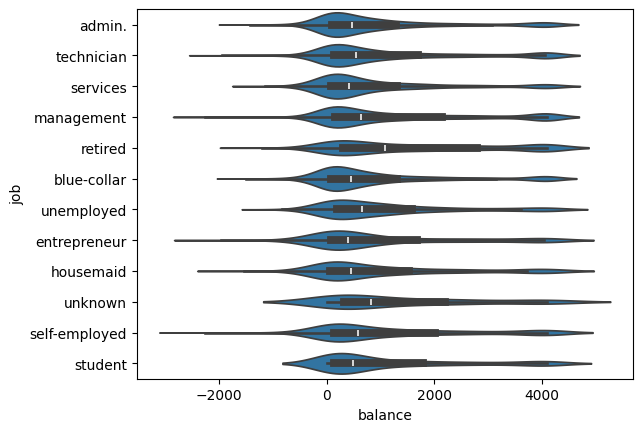

In [112]:
sb.bar(data=df,y='job',x='balance')

<Axes: xlabel='balance', ylabel='job'>

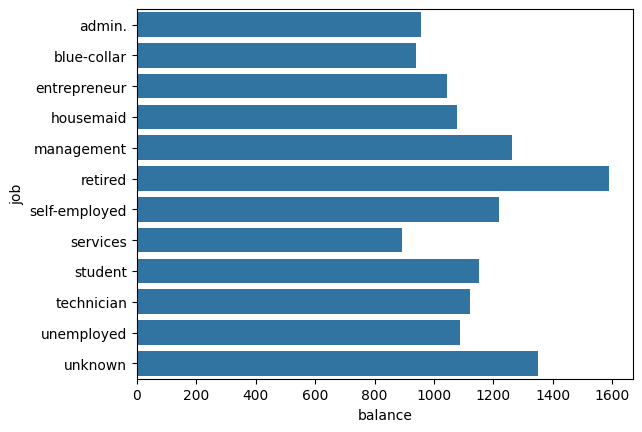

In [121]:
sb.barplot(data=x,x='balance',y='job')

<BarContainer object of 12 artists>

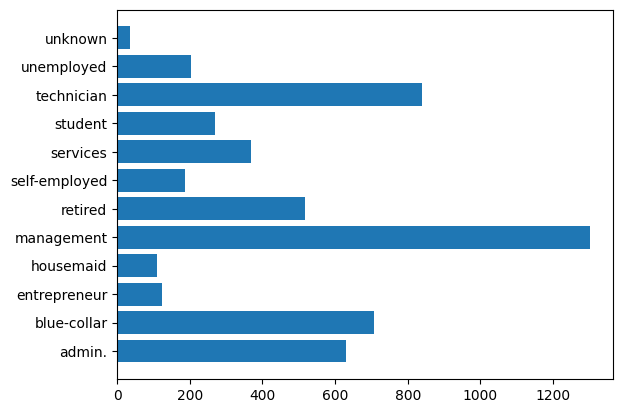

In [148]:
le=LabelEncoder()
df['deposit']=le.fit_transform(df['deposit'])
sub=df.groupby('job')['deposit'].sum().reset_index()
plt.barh(y=sub['job'],width=sub['deposit'])

<Axes: xlabel='count', ylabel='job'>

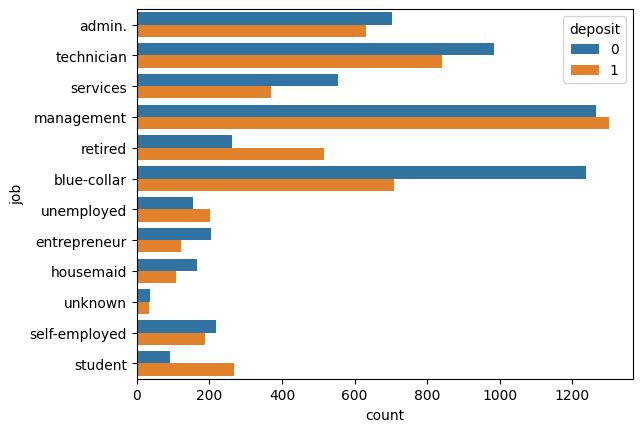

In [151]:
sb.countplot(data=df,y='job',hue='deposit')

ValueError: list.remove(x): x not in list

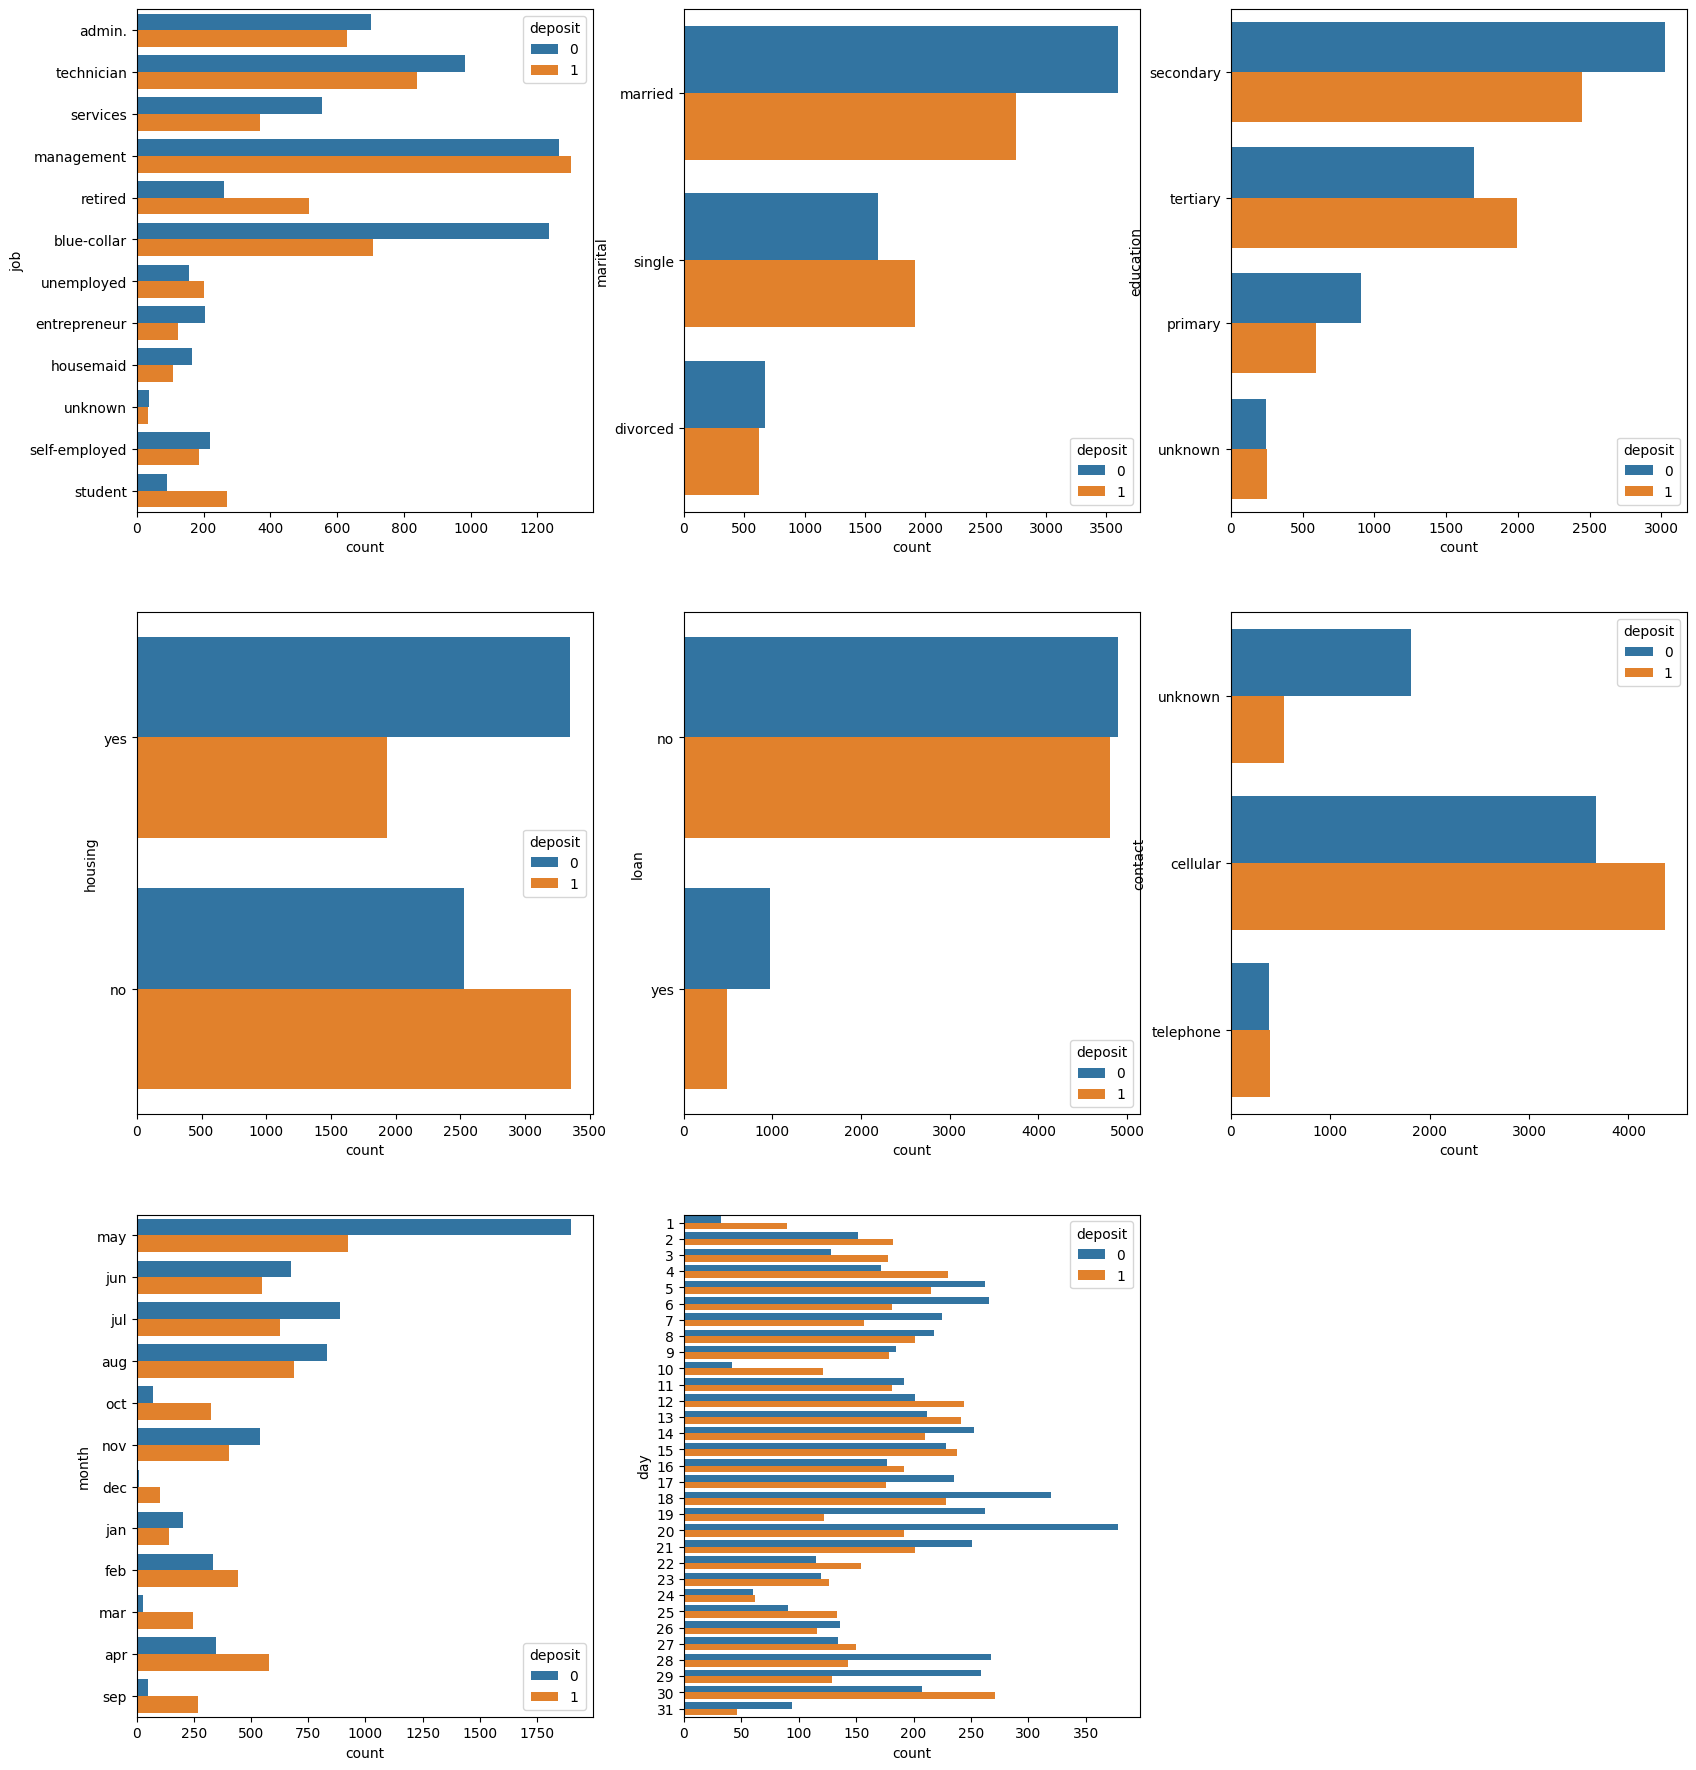

In [186]:
# cat.pop(cat.index('deposit'))
plt.figure(figsize=(20,30))
for i,col in enumerate(cat):
    plt.subplot(4,3,i+1)
    sb.countplot(data=df,y=col,hue='deposit')